In [1]:
import torch.nn
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.0.1'

# Loading data

In [2]:
#Parameters for linear regresion function

weight = 0.7
bias = 0.3

#Parameter for creating dataset

start = 0
end = 1
step = 0.02

In [3]:
#Create data
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

In [4]:
# Random split of data for training and testing
from torch.utils.data import TensorDataset, DataLoader

train_size = int(0.8 * len(X)) 
test_size = len(X) - train_size 

dataset = TensorDataset(X, y)
shuffle_loader = DataLoader(dataset, batch_size=len(X), shuffle=True)

X_shuffled, y_shuffled = next(iter(shuffle_loader))

X_train, X_test = X_shuffled[:train_size], X_shuffled[train_size:]
y_train, y_test = y_shuffled[:train_size], y_shuffled[train_size:]


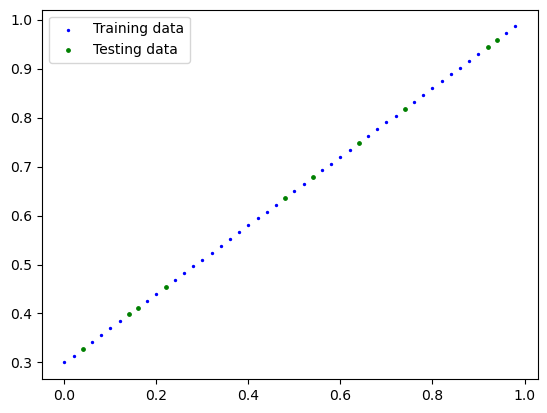

In [5]:
import utils
utils.plot_predictions(X_train, y_train, X_test, y_test)

In [6]:
# building linear regression model

class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float32))
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weights * x +self.bias


In [7]:
model_0 = LinearRegressionModel()
model_0.state_dict()

OrderedDict([('weights', tensor([0.1227])), ('bias', tensor([0.8409]))])

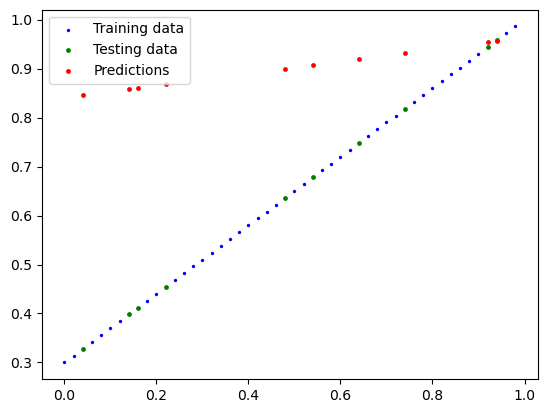

In [8]:
#testing predictions with model

with torch.inference_mode():
    y_preds = model_0(X_test)
    
utils.plot_predictions(X_train, y_train, X_test, y_test, y_preds)

In [9]:
# setup mean absolut error loss function

loss_function = nn.L1Loss()

In [10]:
#setup scholastic gradiant descent with learning rate

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [11]:
#setting up training loop

epochs = 100

loss_log = []

for epoch in range(epochs):
    
    model_0.train()
    
    model_0.eval()
    
    y_preds = model_0(X_train)

    loss = loss_function(y_preds, y_train)
    
    loss_log.append(loss.item())
    
    optimizer.zero_grad()
    
    loss.backward()
    
    optimizer.step()
    
    model_0.eval()



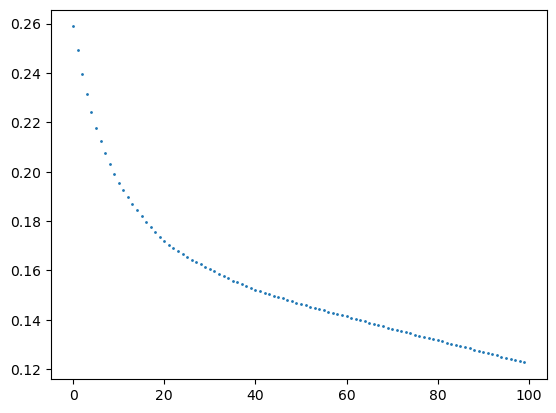

In [12]:
plt.scatter(range(len(loss_log)), loss_log, s=1)

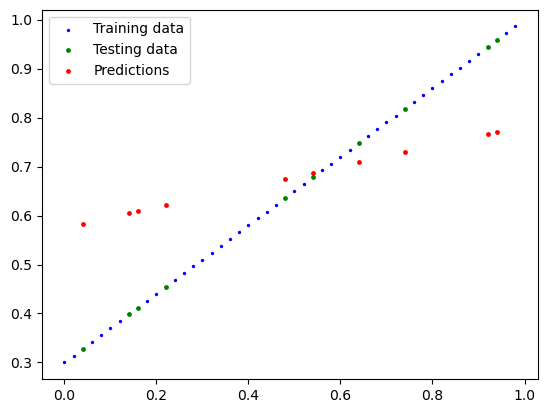

In [13]:
with torch.inference_mode():
    y_preds = model_0(X_test)

utils.plot_predictions(X_train, y_train, X_test, y_test, y_preds)
